### 3차 다항식 모델을 이용해 사인(sine) 함수를 근사적으로 예측하는 방법
- 학습 목표: 무작위 a, b, c, d 값을 점차적으로 수정하면서, 3차 다항식의 결과가 '정답'인 사인 함수와 가장 비슷해지도록 만드는 것  
즉, 머신러닝 모델(여기서는 3차 다항식)이 어떻게 특정 함수(여기서는 사인 함수)의 패턴을 학습하고   
흉내 내는지 그 기본 원리를 이해하기 위한 실습

1. 순전파 (Forward Pass) : 현재 파라미터(a,b,c,d)로 예측값
2. 손실 계산 (Loss Calculation) : 예측이 정답과 얼마나 다른지 '오차(손실)'를 계산
3. 역전파 및 가중치 업데이트 (Backward Pass & Update) : '미분'을 통해 오차를 줄일 수 있는 방향(기울기)을 알아내고,  
그 방향으로 파라미터(a,b,c,d)를 아주 조금씩 수정

In [2]:
import math
import torch
import matplotlib.pyplot as plt

In [3]:
# 학습용 데이터
x = torch.linspace(-math.pi,math.pi,1000)
# 정답
y = torch.sin(x)

In [10]:
# 3차 다항식
# f(x) = a*x**3 + b*x**2 + c*x + d
# 초기화
a = torch.randn(())
b = torch.randn(())
c = torch.randn(())
d = torch.randn(())
y_random = a*x**3 + b*x**2 + c*x + d

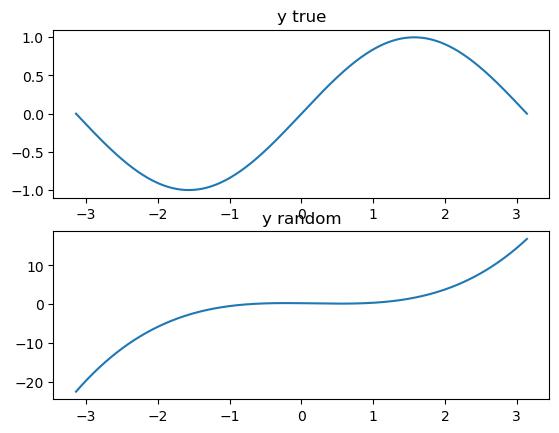

In [11]:
# 시각화
# 1. 실제값 시각화
plt.subplot(2,1,1)
plt.title('y true')
plt.plot(x,y)
# 2. 임의의 가중치로 만든 예측용 값으로 시각화
plt.subplot(2,1,2)
plt.title('y random')
plt.plot(x,y_random)

plt.show()

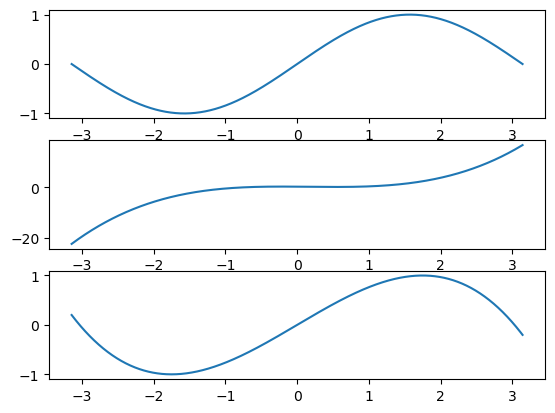

In [ ]:
# 파라메터 정의
leanring_rate = 1e-6        # 학습률 정의
total_loss = []
for epoch in range(2000):       # 2000번은 학습 횟수
    # forward
    y_pred = a*x**3 + b*x**2 + c*x + d  # 모델 # 현재 모델(현재의 a, b, c, d 값)을 가지고 입력값 x에 대한 예측값 y_pred를 계산하는 단계
    # 손실 정의 MSE(평균제곱오차)  # 오차를 제곱하는 이유는 1)음수를 방지해서 크기만 보도록 2)오차가 큰 값에 큰 패널티를 부여하기 위해서
    loss = (y_pred-y).pow(2).mean().item() # => 0으로 가까워질수록 정확해짐   #pow(2) -> 제곱이라는 뜻/ # item 텐서에 저장된 숫자값만 추출(그래프 추적을 피함)
    # loss = torch.abs((y_pred-y)).mean().item() -> 이렇게 절대값을 씌워도 가능 
    # loss = torch.sqrt((y_pred-y)).mean().item() -> 이렇게도 가능
    total_loss.append(loss)
    #if epoch % 100 == 0 :       # 2000번 중에 100번 당 그래프 하나씩만 그린다
    #    print(f'epoch{epoch+1} : loss : {loss}')
    # 역전파 계산(BackPropagation) loss 값을 줄이기 위해서 a,b,c,d,를 어느 방향으로 움직여야 할 지 계산
    # 미분 연쇄법칙이라는 미분 공식 사용
    grad_y_pred = 2.0*(y_pred - y) # 기울기의 미분값/ "예측값이 1만큼 변할 때, 손실은 2 * (y_pred - y) 만큼 변한다"는 의미
    grad_a = (grad_y_pred*x**3).sum() # a에 대한 최종 기울기
    grad_b = (grad_y_pred*x**2).sum()
    grad_c = (grad_y_pred*x).sum()
    grad_d = (grad_y_pred).sum()
    # 가중치 업데이트 -> 위에서 계산한 기울기를 사용하여 손실을 줄이는 방향으로 파라미터 a,b,c,d를 실제로 수정
    a -= leanring_rate * grad_a  # 손실이 가장 커지는 방향으로 손실을 줄이려면, 그 반대 방향(-)으로 파라미터를 이동시켜야 한다/learning_rate는 그 이동하는 보폭(크기)을 조절
    b -= leanring_rate * grad_b
    c -= leanring_rate * grad_c
    d -= leanring_rate * grad_d

plt.subplot(3,1,1)
plt.plot(x,y)
plt.subplot(3,1,2)
plt.plot(x,y_random)
plt.subplot(3,1,3)
plt.plot(x,y_pred)

이 전체 코드 블록은 for 루프 안에서 2000번 반복  
반복될 때마다 모델은 예측을 하고(Forward), 예측이 얼마나 틀렸는지(loss)를 계산한 뒤,  
이 오차를 줄이기 위해 각 파라미터를 어느 방향으로 얼마나 수정해야 할지(Backpropagation) 계산하여,  
실제로 파라미터를 수정(Update)

이 과정을 거치면서 a, b, c, d는 점차 최적의 값으로 수렴하고,  
모델의 3차 함수 그래프는 우리가 원하는 sin(x) 그래프와 매우 유사한 모양으로 변화  
이것이 바로 머신러닝 모델의 '학습' 과정  



In [ ]:
plt.plot(range)

D-loss / D-a  
D-loss / D-b  
D-loss / D-c  
D-loss / D-d  

loss는 파라미터들과 직접 연관이 없음  
다만 다음과 같은 연쇄구조를 가진다(chain)  

a,b,c,d -> ypred와 연관 -> loss와 연관  

loss = (ypred - loss)  

D-loss / D-a = D-ypred / D-a * D_loss / D-ypred  
 D-loss / D-ypred = 2*(ypred-y)
 D-ypred / D-a = x**3

 ---

### 회귀모델 딥러닝 

In [42]:
# 보스턴 집값 예측

import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
data.shape

(506, 13)

In [ ]:
# pytorch
# 미분을 자동으로 계산
# 계산된 미분은 optimizer를 통해 적용 : 최적화 알고리즘

import torch
import torch.nn as nn
from torch.optim.adam import Adam

# 모델정의
model = nn.Sequential(
    nn.Linear(data.shape[1],100), # 13의 데이터를 입력받아서 결과를 100개 즉 100를 예측/ 첫번쨰은닉층 -> 입력의 크기를 정한다
    nn.ReLU(),                    # 활성화 함수- 비선형선 추가
    nn.Linear(100,1)        # 100개의 예측 결과를 받아서 최종 1개를 예측
)

# 하이퍼 파라미터
batch_size = 100
leanring_rate = 1e-03  # -03이면 소수점 뒤에 세자리/ +면 0이 3개 => 0.001을 뜻함

# 옵티마이저 정의 -> 계산된 기울기를 사용하여, 모델의 파라미터(가중치,편항)을 효울적으로 업데이트하는 알고리즘
optim = Adam(model.parameters(),lr=leanring_rate)

target = target.reshape(-1,1)
# 학습루프
for epoch in range(200):        # 바깥쪽 루프 -> 에포크로 몇번 학습할지를 정하는 것
    for i in range(len(data)//batch_size):      # 안쪽 루프 -> 배치를 이용하여 몇번에 나누어 학습할지를 정한다
        start = i*batch_size
        end = start + batch_size
        X = torch.FloatTensor(data[start:end])
        y = torch.FloatTensor(target[start:end])

        # 1. 기울기 계산
        optim.zero_grad() # 학습이후 다음 학습에 이전 가중치가 계산되는 것을 방지
        # 2. 순전파 및 손실 계산
        preds = model(X)    # preds, 정답 shape 같아야 함
        loss = nn.MSELoss()(preds,y)  # __call__ 자동으로 호출. 각 파라메터의 그레이던트를 자동으로 계산  
        # 3. 역전파(기울기 계산)
        loss.backward()
        # 4. 파라미터 업데이트
        optim.step()        # 옵티마이저가 .grad 정보를 사용해서 파라메터를 갱신
    if epoch % 20 == 0 :    # 학습 경과 출력
        print(f'epoch : {epoch+1} : loss : {loss.item()}') # 에포크의 가장 마지막 배치만 출력(평균)

    

epoch : 1 : loss : 72.85647583007812
epoch : 21 : loss : 22.830190658569336
epoch : 41 : loss : 19.293346405029297
epoch : 61 : loss : 17.68263053894043
epoch : 81 : loss : 16.586559295654297
epoch : 101 : loss : 15.954132080078125
epoch : 121 : loss : 15.488677978515625
epoch : 141 : loss : 15.152113914489746
epoch : 161 : loss : 14.962847709655762
epoch : 181 : loss : 14.725432395935059


순전파 : X -> model -> preds -> loss  
역전파 : dloss / lpreds 계산해서 각 선형층의 파라메터(가중치, 편향)로 전파  
loss.backward() 호출되어서 pytorch autograd가 연쇄법칙(chain rule)을 이용해서 각 파라메터 .grad를 채움  
optim.step() : .grad를 읽어서 파라메터를 갱신  

RuLU(활성화 함수) : max(0,z)  
z가 음수이면 0, 양수이면 그대로 전달  
역전파   
    z > 0 dReLU(z)/ dz = 1  
    z <= 0 dReLU(z)/ dz = 0  
    비선형을 제공해서 계산이 간단해진다  
    기울기 소실이 sigmoid, tanh 보다 유리  
    음수이면 0이니까 일부 뉴런이 비활성화되어 표현이 희소해진다 -> LeakReLU  

Adam : 옵티마이저  
       모멘텀과 스케일 조정 두가지 방법을 결합    
       적응적 학습률 : 파라메터 별로 학습률을 조정 -> 초기값이 안정적인 경향
       빠른 수렴 : SDG보다 빠름
       튜닝이 거의 필요없음... 기본 파라메터가 lr = o.oo1도 좋은 성능
       단점 : 과적합이 다른 최적화 모델에 비해 발생하기 쉬운 구조  

옵티마이저 : 모델 파라메터를 손실이 줄어들게 갱신하는 역할
p_t : 현재 파라메터
n : 학습률
gt  : 현재 그레이디언트

p_t+1 = p_t-n*gt
단점 : 기울기가 들쑥날쑥(노이즈에 약하다)
    모든 파라메터가 같은 학습률을 적용(비효율적)
    -> 모멘텀, 스케일 조정

 모멘텀: 이전 기울기의 방향을 기억해서 관성처럼 부드럽게 이동하는 기법  
    vi : 누적된 속도 또는 1차모멘트
    gt  : 현재 그레이디언트
    bi L 모멘텀의 개수(보통0.9)
    n : 학습률
    vt : b1vt-1 (1-b1)get
        pt+1 = pt - n*vt

시점
    t : 1           단순히 g1을 따라감
    t : 2           이전 속도 v1의 일부를 남겨서 새로운 방향에 더해
    t -> inif       여러 스텝 동안 방향이 일정하면 점점 가속되어 빠르게 수렴

기울기가 변해도 관성 떄문에 부드럽게 움직인다.

스케일 조정
    파라메터의 기울기의 크기를 고려해서 학습률을 자동으로 조정
    과거 파라메터의 크기를 추적해서 큰 변동이 있었더 파라메터는 작게, 작은 변동은 크게 이동

아담 : 모멘텀+스케일을 모두 조정하는 하이브리드 방식
    step 1 모멘텀 
    step 2 스케일 조정
    step 3 바이어스 보정/ 초기 스텝에서는 m,v = 0 보정
    step 4 최종업데이트 -> 모멘텀으로 얻은 방향 + 스케일 조정된 학습률 이동

SGD                단순히 그레이디언트   -> 진동이 심하고 느림
Momentum           과거 방향의 관성 사용 -> 진동완화, 빠른 수렴
RMSProp / AdaGrad  그레이디언트 제곱의 평균으로 스케일 조정 -> 파라메터별 자동 학습률
Adam               모멘텀 + RMSProp 결합 -> 기본설정도 훌륭함

In [44]:
# 모델 성능 평가  : 예측
print(data.shape , target.shape)
predict = model(torch.FloatTensor(data)).detach().numpy()
predict.shape,   target.shape

(506, 13) (506,)


((506, 1), (506,))

In [45]:

from sklearn.metrics import r2_score
r2_score(target, predict)

0.6409536840436353

In [ ]:

# 적절한 머신러닝 알고리즘으로 비교 평가

In [47]:
# ----- 디버깅을 위한 코드 추가 -----
print(f"분할 전 X_data의 형태: {X_data.shape}")
print(f"분할 전 y_data의 형태: {y_data.shape}")
# ------------

분할 전 X_data의 형태: (1000, 1)
분할 전 y_data의 형태: (100, 1)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as lpt
from sklearn.ensemble import RandomForestRegressor

x = torch.linspace(-math.pi, math.pi, 1000)
y = torch.sin(x)
X_data = x.numpy().reshape(-1, 1)
y_data = y.numpy().reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.2, random_state=42
)

linear_model=LinearRegression()
linear_model.fit(X_train,y_train)
y_pred = linear_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'선형 회귀 모델의 최종 MSE : {mse}')




선형 회귀 모델의 최종 MSE : 0.20671740174293518
